<a href="https://colab.research.google.com/github/amit17133129/An-Explanation-To-Artificial-Neural-Network/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Explaination On Artificial Neural Netowrk</center></h1>
<p align="center">
  <img src="https://github.com/amit17133129/codes/blob/master/Brain.gif?raw=true" alt="Sublime's custom image"/>
</p>



<center>An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.</center>


## **Importing Pandas**

<center>Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.</center>


In [1]:
import pandas as pd

## **Importing Dataset**

Here i have imported dataset of churn modelling in which you have features like 'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'. 

In [2]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

As the *Exited* feature is to be in Y variable so below i am creating a y variable with *Exited* feature in that variable.

In [26]:
y = dataset['Exited']

X will contains `['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'EstimatedSalary']` features.

In [5]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'EstimatedSalary']]
X.shape

(10000, 8)

# **One Hot Encoding For Geography Feature**
Here as you can see in the *Geography* reason you have you have three columns after one hot encoding i.e Germany, Spain, France. So to avoid dummy trap i have used a fn from pandas i.e `get_dummies` in which i have use  `drop_first=True` that will helps us to avoid dummy trap.

In [6]:
Geo = pd.get_dummies(dataset['Geography'], drop_first=True)
Geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


## **One Hot Encoding For *Gender* Feature**
Here as you can see in the Geography reason you have you have three columns after `one hot encoding` i.e Germany, Spain, France. So to avoid dummy trap i have used a fn from pandas i.e `get_dummies` in which i have use `drop_first=True` that will helps us to avoid dummy trap.

In [7]:
Gender = pd.get_dummies(dataset['Gender'], drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


**Concatinating X, Geo, Gender**

In [8]:
X = pd.concat([X, Geo, Gender], axis=1)
X.shape

(10000, 11)

**importing *train_test_split***

Before feeding your data into the neural network you need to split that data into `training set` and `testing set`. this can be done using 

```
train_test_split method from sklearn library and from model_selection module
```




<p align="center">
  <img src="https://github.com/amit17133129/codes/blob/master/train_test_split.gif?raw=true" alt="Sublime's custom image"/>
</p>

In [9]:
  from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)

## importing Sequrntial Model From keras 

In [10]:
from keras.models import Sequential
model = Sequential()            # creating Empty model

#**Importing Dense Layer**

In [11]:
from keras.layers import Dense

**Adding First Layer to model with neurons=8, input_feature=11 and activation fn = relu (rectified linear unit)**

In [12]:
model.add(Dense(units=8, activation='relu', input_dim=11))

`Relu`  is an activation function i.e its will activate the neurons in the hidden layers. The main functions of `relu` is that all the output from a layers from all the neuron will pass to another layers of the respective neurons.

<p align="center">
  <img src="https://github.com/amit17133129/codes/blob/master/Relu.gif?raw=true" alt="Sublime's custom image"/>
</p>


## Adding Second Layer with neurons=6 and activation fn = relu  
In this layer i have used `6 neurons` and with the `relu` activation fn.


In [13]:
model.add(Dense(units=6, activation='relu'))

# Adding third layer with neurons=6 and activation fn = relu
In this layer i have used `6 neurons` and with the `relu` activation fn.

In [14]:
model.add(Dense(units=6, activation='relu'))

# Adding last layer with neurons=1 and activation fn = relu
In this layer i have used `1 neuron` and with the `sigmoid` activation fn. As you can see in the below image after summation from all the neurons then the output goes to `sigmoid` fn and that fn will gives you a `binary` output (1/0). As it is giving onlu one output then only `one neuron` is required.

<p align="center">
  <img src="https://eecs.wsu.edu/~cook/dm/lectures/l5/img43.gif" alt="Sublime's custom image"/>
</p>





In [15]:
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 8,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'

## A  visaul Explaination of the Artificial Neural Network

![DeeepLearning](https://github.com/amit17133129/codes/blob/master/Deep%20learning.gif?raw=true)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


As you can see in below <b> `Optimizers Comaprision` </b> You will find that there are different tyes of optimizers are shown. In which they have different speed to move. This speed denotes the learning from the weights. if your optimizers have less speed then it will learn more things but as you can see in terms of <i> `Ada Delta` </i> the speed is quite high. So its jups and moves out of the graph. where as in case of <i>`Adam`</i> because i have used Adam you will find that speed of learning from the weights is quite slow compare to <i>`Ada Delta`</i>. Also you need to set the ```learning rate``` to move your optimizers very slowly. So, it can learn much more from the respective weights.

<p align="center">
  <img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" alt="Sublime's custom image"/>
</p>



In [18]:
from keras.optimizers import Adam

As i have only one output that whether the Employee is exited from the company or not. i.e  Binary output (Exited/notexited). So the loss will be generating in binary. To handle the binary loss we have `binary_crossentropy`.

In [19]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001))

<center><h1>Below You will find the weights of the model</h1></center>

In [20]:
model.get_weights()

[array([[-0.02066076, -0.28968173,  0.2522359 , -0.11069694, -0.30354032,
         -0.35479504, -0.37940133,  0.12989408],
        [ 0.40807408,  0.33400285, -0.29044044,  0.12279463,  0.02866024,
          0.16505909, -0.43437654, -0.08052927],
        [ 0.08574432,  0.31294584,  0.34127384, -0.5403073 ,  0.22737062,
          0.3964677 , -0.4407091 , -0.11779466],
        [-0.47511214, -0.51364213, -0.5219625 ,  0.08389795,  0.0482738 ,
         -0.21094859, -0.04436564,  0.3212192 ],
        [ 0.21555561, -0.07330978,  0.21048409,  0.51580375,  0.3181417 ,
         -0.37364948,  0.38994366,  0.35384363],
        [ 0.4174667 , -0.47016186, -0.18425742,  0.19694513, -0.42180163,
         -0.0538637 ,  0.02123272,  0.3795498 ],
        [-0.50346905,  0.22021902, -0.0587213 , -0.39206484, -0.11001834,
          0.39269185, -0.01426095, -0.34227383],
        [ 0.14976585,  0.4215495 , -0.4487199 , -0.10118306,  0.44541937,
         -0.02592146, -0.3683002 , -0.15695423],
        [ 0.0465

<center><h1>Training Phase</h1></center>

For training the model we need to fit the model and it require training data i.e `X_train`, `y_train`. And the `epochs is 100`. That means your training data will goes 100 times through the neural network which you have build above with the respective layers.

<p align="center">
  <img src="https://github.com/amit17133129/codes/blob/master/feedforward_backpropagation.gif?raw=true" alt="Sublime's custom image"/>
</p>



In [21]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 334.2865
Epoch 2/100
250/250 [==============================] - 0s 998us/step - loss: 319.7225
Epoch 3/100
250/250 [==============================] - 0s 970us/step - loss: 304.7026
Epoch 4/100
250/250 [==============================] - 0s 967us/step - loss: 308.1894
Epoch 5/100
250/250 [==============================] - 0s 987us/step - loss: 291.7599
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 288.4853
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 277.5352
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 268.2603
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 257.6669
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 247.9663
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 241.2878
Epoch 12/100
250/250 [==============================] - 0s 992us/s

In [22]:
loss = pd.DataFrame(model.history.history)
loss

,loss
0,327.813019
1,318.202637
2,309.605621
3,300.935791
4,292.179413
...,...
95,10.398937
96,10.145731
97,9.901025
98,9.662745


## Plotting Loss Graph
As you can see the graph of the loss is slowly decreasing. So this can be possible because of `Adam` Optimizers

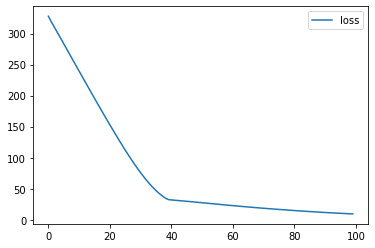

In [23]:
loss.plot()

## Prediction
To predict i am just giving random iputs but you can use the right values and it will predict on that case.


In [33]:
print("The employee will  :", model.predict([[1,2,3,4,5,6,7,8,9,10,11]])[0][0])

The employee will  : 0.4933369
